# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
API_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
unites = "metric"
query_url = f"{url}appid={API_key}&q={city}&unites={unites}"

In [5]:
file = open("test.csv", "w")
print("Beginning Data Retrieval")
print("-------------------------")
for i in range(len(cities)):
    try:
        temp_city = cities[i]
        query_url = f"{url}appid={API_key}&q={temp_city}&unites={unites}"
        response = requests.get(query_url).json()
        #print(json.dumps(response, indent= 4))
        if response["name"] == "":
            raise Exception()
            
        file.write(f'{response["name"]},')
        file.write(f'{response["coord"]["lat"]},')
        file.write(f'{response["coord"]["lon"]},')
        file.write(f'{response["main"]["temp_max"]},')
        file.write(f'{response["main"]["humidity"]},')
        file.write(f'{response["clouds"]["all"]},')
        file.write(f'{response["wind"]["speed"]}')
        file.write("\n")
        print("Processing Record", i+1, "of Set 1 |", temp_city)
    except:
        print("City not found.skipping...")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | bandarbeyla
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | najran
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | champasak
Processing Record 12 of Set 1 | caravelas
Processing Record 13 of Set 1 | filimonovo
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | waingapu
City not found.skipping...
Processing Record 21 of Set 1 | araouane
Processing Record 22 of Set 1 | talnakh
Processing Record 23 of Set 1 | kemijarvi
Processing Record 24 

Processing Record 203 of Set 1 | port elizabeth
Processing Record 204 of Set 1 | coahuayana
City not found.skipping...
Processing Record 206 of Set 1 | port blair
Processing Record 207 of Set 1 | faanui
Processing Record 208 of Set 1 | santa maria
Processing Record 209 of Set 1 | jodoigne
City not found.skipping...
City not found.skipping...
Processing Record 212 of Set 1 | palmer
Processing Record 213 of Set 1 | yeppoon
Processing Record 214 of Set 1 | peniche
City not found.skipping...
Processing Record 216 of Set 1 | kaitangata
Processing Record 217 of Set 1 | tilichiki
Processing Record 218 of Set 1 | puerto maldonado
Processing Record 219 of Set 1 | kirn
Processing Record 220 of Set 1 | karuzi
Processing Record 221 of Set 1 | goderich
Processing Record 222 of Set 1 | kodiak
Processing Record 223 of Set 1 | gumdag
Processing Record 224 of Set 1 | quang ngai
City not found.skipping...
Processing Record 226 of Set 1 | thinadhoo
Processing Record 227 of Set 1 | mahebourg
City not foun

Processing Record 404 of Set 1 | novikovo
Processing Record 405 of Set 1 | darien
Processing Record 406 of Set 1 | khandyga
Processing Record 407 of Set 1 | zyryanka
Processing Record 408 of Set 1 | antalaha
Processing Record 409 of Set 1 | njombe
Processing Record 410 of Set 1 | seoul
Processing Record 411 of Set 1 | marienburg
Processing Record 412 of Set 1 | praia
Processing Record 413 of Set 1 | toora-khem
Processing Record 414 of Set 1 | bonfim
Processing Record 415 of Set 1 | eureka
City not found.skipping...
Processing Record 417 of Set 1 | mega
City not found.skipping...
City not found.skipping...
City not found.skipping...
Processing Record 421 of Set 1 | umm kaddadah
Processing Record 422 of Set 1 | yarmouth
Processing Record 423 of Set 1 | quesnel
Processing Record 424 of Set 1 | lavrentiya
Processing Record 425 of Set 1 | biltine
City not found.skipping...
Processing Record 427 of Set 1 | beringovskiy
Processing Record 428 of Set 1 | portree
Processing Record 429 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.read_csv("cities.csv")

In [7]:
df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [19]:
df.set_index("City_ID", inplace = True)
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,547.000000,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000
mean,49.495430,1.558379e+09,67.265082,19.710402,20.861609,64.975119,8.657057
std,36.887333,7.826709e+01,21.723477,33.637627,90.285396,18.721163,5.859917
min,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,14.000000,1.558379e+09,52.000000,-6.315000,-60.820000,53.940000,4.680000
50%,47.000000,1.558379e+09,71.000000,21.430000,21.550000,64.990000,7.000000
75%,81.000000,1.558379e+09,86.000000,47.895000,103.165000,80.600000,11.410000
max,100.000000,1.558379e+09,100.000000,78.220000,179.320000,104.100000,46.080000


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
df = df[df["Humidity"]<=100]
df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,547.000000,5.470000e+02,547.000000,547.000000,547.000000,547.000000,547.000000
mean,49.495430,1.558379e+09,67.265082,19.710402,20.861609,64.975119,8.657057
std,36.887333,7.826709e+01,21.723477,33.637627,90.285396,18.721163,5.859917
min,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,14.000000,1.558379e+09,52.000000,-6.315000,-60.820000,53.940000,4.680000
50%,47.000000,1.558379e+09,71.000000,21.430000,21.550000,64.990000,7.000000
75%,81.000000,1.558379e+09,86.000000,47.895000,103.165000,80.600000,11.410000
max,100.000000,1.558379e+09,100.000000,78.220000,179.320000,104.100000,46.080000


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [22]:
df[df["Humidity"] > 100].index

Int64Index([], dtype='int64', name='City_ID')

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [27]:
# calculate outlier
temp = df.describe()["Humidity"]
IQR = temp.loc["75%"] - temp.loc["25%"]
lower = temp.loc["25%"] - 1.5 * IQR
upper = temp.loc["75%"] + 1.5 * IQR
display(upper)
display(lower)

137.0

1.0

In [36]:
clean_city_data = df[(df["Humidity"]<upper) & (df["Humidity"]>lower)]
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [37]:
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


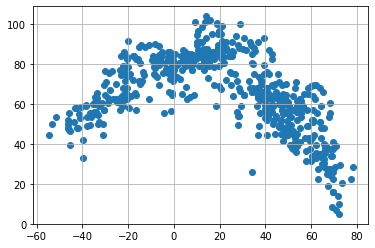

In [40]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"])
plt.grid()

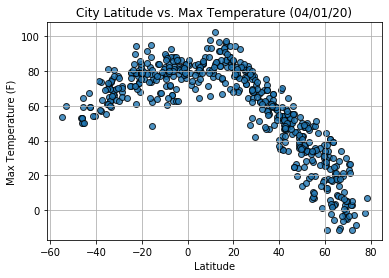

## Latitude vs. Humidity Plot

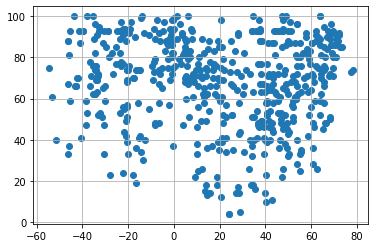

In [41]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"])
plt.grid()

## Latitude vs. Cloudiness Plot

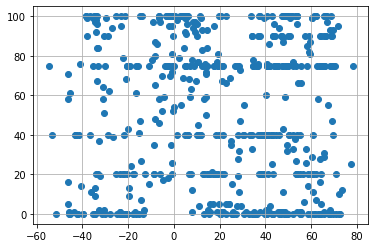

In [43]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"])
plt.grid()

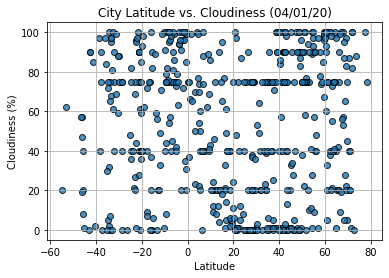

## Latitude vs. Wind Speed Plot

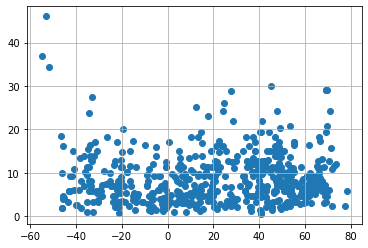

In [44]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"])
plt.grid()

## Linear Regression

In [55]:
northern = clean_city_data[clean_city_data["Lat"] >= 0]
southern = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r_value is: -0.8151657406810829


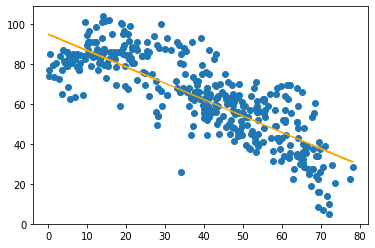

In [54]:
slope, intercept, r,p, se = linregress(northern["Lat"], northern["Max Temp"])
x = northern["Lat"]
plt.scatter(northern["Lat"], northern["Max Temp"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)
 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r_value is: 0.7668153152076321


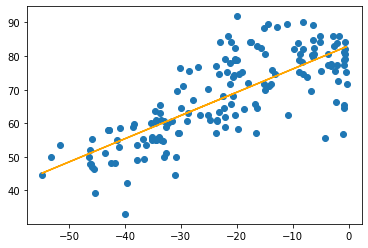

In [56]:
slope, intercept, r,p, se = linregress(southern["Lat"], southern["Max Temp"])
x = southern["Lat"]
plt.scatter(southern["Lat"],southern["Max Temp"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)
 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_value is: 0.10358336015746496


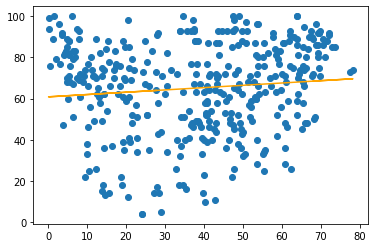

In [57]:
slope, intercept, r,p, se = linregress(northern["Lat"], northern["Humidity"])
x = northern["Lat"]
plt.scatter(northern["Lat"],northern["Humidity"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_value is: 0.1139892818606221


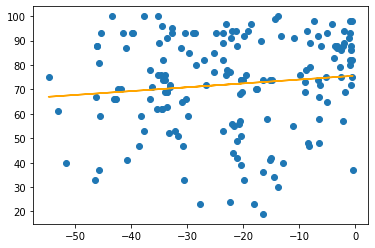

In [60]:
slope, intercept, r,p, se = linregress(southern["Lat"], southern["Humidity"])
x = southern["Lat"]
plt.scatter(southern["Lat"],southern["Humidity"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_value is: -0.08733547918934018


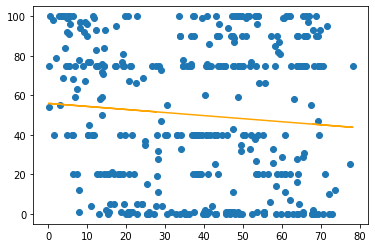

In [58]:
slope, intercept, r,p, se = linregress(northern["Lat"], northern["Cloudiness"])
x = northern["Lat"]
plt.scatter(northern["Lat"],northern["Cloudiness"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_value is: 0.23009846166335704


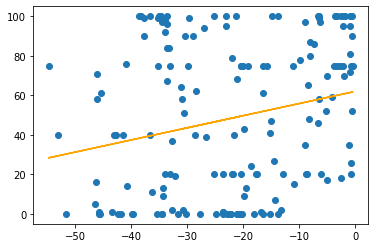

In [61]:
slope, intercept, r,p, se = linregress(southern["Lat"], southern["Cloudiness"])
x = southern["Lat"]
plt.scatter(southern["Lat"],southern["Cloudiness"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_value is: 0.10713827743884798


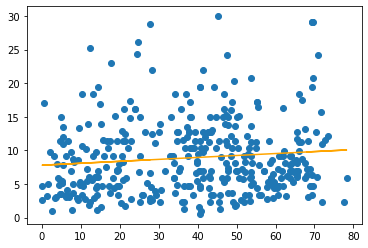

In [59]:
slope, intercept, r,p, se = linregress(northern["Lat"], northern["Wind Speed"])
x = northern["Lat"]
plt.scatter(northern["Lat"],northern["Wind Speed"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_value is: -0.33605638539234134


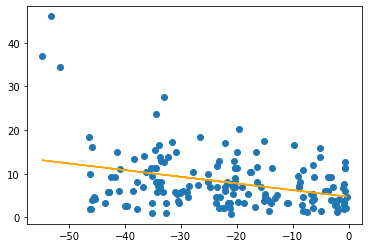

In [62]:
slope, intercept, r,p, se = linregress(southern["Lat"], southern["Wind Speed"])
x = southern["Lat"]
plt.scatter(southern["Lat"],southern["Wind Speed"])
plt.plot(x, intercept+slope*x, color = "orange")
print("The r_value is:", r)